In [1]:
from __future__ import division
import glob
import re
import os,sys
from astropy.io import fits
from astropy.io.fits import getheader, getdata
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy.stats import chisquare as cs
import sep
from matplotlib.patches import Ellipse

### First the object list will be defined, organized, and seperated into categories

In [19]:
# Create a list of all of the fits file directories
obj_list = glob.glob('/Users/hitom/Documents/Star_Clusters_Project_data/*.fits')

In [20]:
obj_list

['/Users/hitom/Documents/Star_Clusters_Project_data\\d1.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d10.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d100.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d101.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d102.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d103.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d104.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d105.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d106.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d107.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d108.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d109.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d11.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d110.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d111.fits',
 '/Users/hitom/Documents/Star

In [21]:
# This will organize the obj_list by the index of the fits file before separation
Organized_obj_list = ['' for x in range(253)]
for j in range(len(Organized_obj_list)):
    try:
        n = int(obj_list[j][51:54])
    except:
        try:
            n = int(obj_list[j][51:53])
        except:
            n = int(obj_list[j][51:52])
    Organized_obj_list[n-1] = obj_list[j]
Organized_obj_list

['/Users/hitom/Documents/Star_Clusters_Project_data\\d1.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d2.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d3.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d4.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d5.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d6.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d7.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d8.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d9.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d10.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d11.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d12.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d13.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d14.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_data\\d15.fits',
 '/Users/hitom/Documents/Star_Clusters_Project_da

In [22]:
# Seperate the fits files by categories
Biases = {}
Blue_Domes = {}
Violet_Domes = {}
Darks = {}
IC1B = {}
IC1V = {}
IC2B = {}
IC2V = {}
IC3B = {}
IC3V = {}
IC4B = {}
IC4V = {}
IC5B = {}
IC7B = {}
IC7V = {}
IC8B = {}
IC8V = {}
IC9B = {}
IC9V = {}
for i in range(len(Organized_obj_list)):
    if(i<10):
        Biases[i] = Organized_obj_list[i]
    elif(10<=i<25):
        Blue_Domes[i-10] = Organized_obj_list[i]
    elif(25<=i<41):
        Violet_Domes[i-25] = Organized_obj_list[i]
    elif(41<=i<50):
        Darks[i-41] = Organized_obj_list[i]
    elif(50<=i<168):
        continue
    elif(168<=i<173):
        IC1B[i-168] = Organized_obj_list[i]
    elif(173<=i<178):
        IC1V[i-173] = Organized_obj_list[i]
    elif(178<=i<183):
        IC2B[i-178] = Organized_obj_list[i]
    elif(183<=i<188):
        IC2V[i-183] = Organized_obj_list[i]
    elif(188<=i<193):
        IC3B[i-188] = Organized_obj_list[i]
    elif(193<=i<198):
        IC3V[i-193] = Organized_obj_list[i]
    elif(198<=i<203):
        IC4B[i-198] = Organized_obj_list[i]
    elif(203<=i<208):
        IC4V[i-203] = Organized_obj_list[i]
    elif(208<=i<213):
        IC5B[i-208] = Organized_obj_list[i]
    elif(213<=i<219):
        continue
    elif(219<=i<224):
        IC7B[i-219] = Organized_obj_list[i]
    elif(224<=i<229):
        IC7V[i-224] = Organized_obj_list[i]
    elif(229<=i<234):
        IC8B[i-229] = Organized_obj_list[i]
    elif(234<=i<239):
        IC8V[i-234] = Organized_obj_list[i]
    elif(239<=i<244):
        IC9B[i-239] = Organized_obj_list[i]
    elif(244<=i<249):
        IC9V[i-244] = Organized_obj_list[i]
    elif(249<=i<251):
        continue
    elif(i==251):
        SDSSB = Organized_obj_list[i]
    elif(i==252):
        SDSSV = Organized_obj_list[i]

### Define a few functions to make handling the arrays easier

In [23]:
# This returns the header of the fits file
def header(array,index):
    header = fits.open(array[index])[0].header
    return header

In [24]:
# This returns the array of the fits file
def data(array,*args):
    index = 0
    for num in args:
        index = num
    try:
        data = fits.open(array[index])[0].data
    except:
        data = fits.open(array)[0].data
    return data

### Now the bias frames will be averaged to get the bias of the telescope

In [25]:
def Bias(array,filename):
    # First add all of the bias frames in a temporary array
    Temp = np.zeros(data(array,0).shape)
    for i in range(len(array)):
        Temp = data(array,i) + Temp
        # Now the temporary array will be averaged for the bias of the telescope
        Average_Bias = Temp[0:1024,0:1024]/len(array)
    # Now the bias frame will be saved as fits files according to the 'filename' input
    # Note: try and except is used so it still runs when a bias still exists
    try:
        hdu = fits.PrimaryHDU(Average_Bias)
        hdul = fits.HDUList([hdu])
        hdul.writeto(filename)
    except:
        pass
    return Average_Bias

In [26]:
Master_Bias = Bias(Biases,'UCO_Lick_Nickel_Telescope_Master_Bias.fits')
Master_Bias

array([[1085.1, 1083. , 1084.1, ..., 1083.5, 1104.8, 1102.5],
       [1084.2, 1085.1, 1080.8, ..., 1079. , 1103.9, 1105.4],
       [1084.1, 1080.9, 1087.9, ..., 1078.8, 1107.7, 1103.7],
       ...,
       [1086.6, 1083.3, 1082.6, ..., 1085.2, 1106.3, 1103.7],
       [1085.8, 1082.1, 1082.7, ..., 1084.2, 1102.6, 1106.4],
       [1087.3, 1080.2, 1076. , ..., 1082.2, 1105.1, 1100.2]])

### Next the dark frames will be reduced and combined.

In [31]:
def Reduce_Darks(array,filename):
    # First the darks will be reduced to per second images, given that they all have an exposure time of 30 seconds.
    # They will simultaneously be added into an array and combined.
    Temp = {}
    Reduced_Darks = np.zeros(Master_Bias.shape)
    ExpTime = 30 #seconds
    for i in range(len(array)):
        Temp[i] = data(array,i)[0:1024,0:1024] - Master_Bias
        Reduced_Darks = Temp[i]/ExpTime + Reduced_Darks
    # Now they will all be averaged into a single dark frame.
    Reduced_Dark = Reduced_Darks/len(array)
    # Now the reduced dark will be saved as fits files according to the 'filename' input
    try:
        hdu = fits.PrimaryHDU(Reduced_Dark)
        hdul = fits.HDUList([hdu])
        hdul.writeto('{0}.fits'.format(filename))
    except:
        pass
    return Reduced_Dark

In [32]:
Master_Dark = Reduce_Darks(Darks,'UCO_Lick_Nickel_Telescope_Master_Dark')
Master_Dark

array([[ 0.41148148,  0.44814815,  0.45592593, ...,  0.41666667,
         0.37703704,  0.39444444],
       [ 0.61185185,  0.52259259,  0.57333333, ...,  0.65925926,
         0.39962963,  0.33481481],
       [ 0.59666667,  0.60333333,  0.40333333, ...,  0.6437037 ,
         0.19518519,  0.64333333],
       ...,
       [ 0.3762963 ,  0.2937037 ,  0.55037037, ...,  0.34888889,
         0.09      ,  0.19148148],
       [ 0.22518519,  0.38555556,  0.27296296, ...,  0.0637037 ,
         0.16148148, -0.03555556],
       [ 0.00851852,  0.40444444,  0.35185185, ...,  0.23037037,
        -0.05148148, -0.04      ]])

### Now the dome flats will be reduced and combined.

In [38]:
def Reduce_Domes(array,filename,string):
    # First the domes will be reduced to per second images, given that they all have an exposure time of 30 seconds.
    # They will simultaneously be added into an array and combined.
    Temp = {}
    Reduced_Dome = np.zeros(Master_Bias.shape)
    if string=='Blue':
        ExpTime = 30 #seconds
    elif string=='Violet':
        ExpTime = 3 #seconds
    for i in range(len(array)):
        Temp[i] = data(array,i)[0:1024,0:1024] - Master_Bias
        Reduced_Dome = Temp[i] + Reduced_Dome - ExpTime*Master_Dark
    # Now the reduced dome will be normalized and saved.
    Master_Dome = Reduced_Dome[0:1024,0:1024]/len(array)
    try:
        hdu = fits.PrimaryHDU(Master_Dome)
        hdul = fits.HDUList([hdu])
        hdul.writeto('{0}.fits'.format(filename))
    except:
        pass
    return Master_Dome

In [39]:
Master_Blue_Dome = Reduce_Domes(Blue_Domes,'UCO_Lick_Nickel_Telescope_Master_Dome_B','Blue')
Master_Blue_Dome

array([[  457.75555556,   324.02222222,   406.02222222, ...,
        10086.46666667, 10405.28888889, 17754.26666667],
       [ 1243.71111111,   681.28888889,   717.73333333, ...,
        22929.08888889, 24032.77777778, 47424.95555556],
       [ 1427.93333333,   729.93333333,   752.46666667, ...,
        23181.28888889, 24471.51111111, 52997.86666667],
       ...,
       [  689.37777778,   309.35555556,   301.28888889, ...,
        13522.53333333, 12991.86666667, 24348.75555556],
       [  646.77777778,   309.46666667,   306.37777778, ...,
        12456.88888889, 11709.62222222, 20411.46666667],
       [  709.97777778,   355.4       ,   327.31111111, ...,
        12944.95555556, 11780.44444444, 18098.46666667]])

In [40]:
Master_Violet_Dome = Reduce_Domes(Violet_Domes,'UCO_Lick_Nickel_Telescope_Master_Dome_V','Violet')
Master_Violet_Dome

array([[  491.72805556,   363.53055556,   438.71972222, ...,
         8686.4375    ,  8958.19388889, 15283.87916667],
       [ 1316.71444444,   736.76972222,   744.355     , ...,
        19758.02222222, 20643.58861111, 40651.15805556],
       [ 1524.4225    ,   791.415     ,   786.64      , ...,
        20017.51888889, 21029.83944444, 45554.87      ],
       ...,
       [  805.45861111,   372.44388889,   377.81138889, ...,
        11209.56583333, 10797.9925    , 20295.66305556],
       [  754.39944444,   369.61833333,   360.41861111, ...,
        10316.04638889,  9709.47805556, 17001.83166667],
       [  806.42444444,   438.02416667,   403.00694444, ...,
        10417.04638889,  9467.30444444, 14684.1075    ]])

### Now the clusters will be reduced individually and combined in seperate functions.

In [68]:
def Reduce_Blue_Cluster(array,filename):
    # First the clusters will be reduced to per second images, given that they all have an exposure time of 30 seconds.
    Temp = {}
    Reduced_Clusters = {}
    Master_Clusters = {}
    ExpTime = 30 #seconds
    for i in range(len(array)):
        Temp[i] = data(array,i)[0:1024,0:1024] - Master_Bias
        Reduced_Clusters[i] = (Temp[i] - ExpTime*Master_Dark)/Master_Blue_Dome
        Master_Clusters[i] = Reduced_Clusters[i]/np.max(Reduced_Clusters[i])
    # Now the reduced clusters will be saved.
    #try:
    #    for i in range(len(array)):
    #        hdu = fits.PrimaryHDU(Master_Clusters[i])
    #        hdul = fits.HDUList([hdu])
    #        hdul.writeto('{0}_{1}.fits'.format(filename,i))
    #except:
    #    pass
    return Master_Clusters

In [70]:
def Reduce_Violet_Cluster(array,filename):
    # First the clusters will be reduced to per second images, given that they all have an exposure time of 30 seconds.
    Temp = {}
    Reduced_Clusters = {}
    Master_Clusters = {}
    ExpTime = 30 #seconds
    for i in range(len(array)):
        Temp[i] = data(array,i)[0:1024,0:1024] - Master_Bias
        Reduced_Clusters[i] = (Temp[i] - ExpTime*Master_Dark)/(10*Master_Violet_Dome)
        Master_Clusters[i] = Reduced_Clusters[i]/np.max(Reduced_Clusters[i])
    # Now the reduced clusters will be saved.
    try:
        for i in range(len(array)):
            hdu = fits.PrimaryHDU(Master_Clusters[i])
            hdul = fits.HDUList([hdu])
            hdul.writeto('{0}_{1}.fits'.format(filename,i))
    except:
        pass
    return Master_Clusters

In [66]:
Reduce_Blue_Cluster(IC1B,'UCO_Lick_Nickel_Telescope_IC1B')
Reduce_Blue_Cluster(IC2B,'UCO_Lick_Nickel_Telescope_IC2B')
Reduce_Blue_Cluster(IC3B,'UCO_Lick_Nickel_Telescope_IC3B')
Reduce_Blue_Cluster(IC4B,'UCO_Lick_Nickel_Telescope_IC4B')
Reduce_Blue_Cluster(IC5B,'UCO_Lick_Nickel_Telescope_IC5B')
Reduce_Blue_Cluster(IC7B,'UCO_Lick_Nickel_Telescope_IC7B')
Reduce_Blue_Cluster(IC8B,'UCO_Lick_Nickel_Telescope_IC8B')
Reduce_Blue_Cluster(IC9B,'UCO_Lick_Nickel_Telescope_IC9B')

{0: array([[-5.13063415e-03, -1.84953944e-02, -1.14689779e-02, ...,
         -2.89048098e-04,  6.61563379e-05, -1.09475056e-04],
        [-4.26509254e-03, -3.09064209e-03, -6.09308612e-03, ...,
          1.46577723e-04, -8.92994073e-05,  1.19535742e-05],
        [-4.08348757e-03, -6.49051776e-03, -8.23343085e-03, ...,
          7.68584771e-05, -3.80578041e-05,  6.18875526e-05],
        ...,
        [-7.87089640e-03, -2.48698038e-02, -2.91644168e-02, ...,
         -4.49169104e-04,  0.00000000e+00,  3.82496745e-05],
        [-9.89187625e-03, -2.66927284e-02, -1.53312443e-02, ...,
          2.01538850e-04, -3.25058590e-04, -4.16602393e-05],
        [-1.05512436e-02, -2.18756256e-02, -2.84540287e-03, ...,
         -1.72043712e-04,  7.56201758e-05, -4.02723897e-05]]),
 1: array([[-6.74991463e-03, -3.32498270e-02, -1.78233161e-02, ...,
         -6.89247762e-04,  1.01586856e-04, -6.86968507e-05],
        [-6.63582365e-03, -9.01081251e-03, -4.58817754e-03, ...,
         -1.56032184e-04, -8.965

In [71]:
Reduce_Violet_Cluster(IC1V,'UCO_Lick_Nickel_Telescope_IC1V')
Reduce_Violet_Cluster(IC2V,'UCO_Lick_Nickel_Telescope_IC2V')
Reduce_Violet_Cluster(IC3V,'UCO_Lick_Nickel_Telescope_IC3V')
Reduce_Violet_Cluster(IC4V,'UCO_Lick_Nickel_Telescope_IC4V')
Reduce_Violet_Cluster(IC7V,'UCO_Lick_Nickel_Telescope_IC7V')
Reduce_Violet_Cluster(IC8V,'UCO_Lick_Nickel_Telescope_IC8V')
Reduce_Violet_Cluster(IC9V,'UCO_Lick_Nickel_Telescope_IC9V')

{0: array([[-9.63561631e-03, -8.81407251e-03, -6.83730887e-03, ...,
         -2.47222808e-04,  3.38656359e-04,  5.55335500e-04],
        [-3.15833299e-03, -6.15332079e-03, -7.00649806e-03, ...,
          5.62423963e-04,  6.10950766e-04,  3.28702366e-04],
        [-1.40872066e-03, -2.32583643e-03, -8.57983329e-03, ...,
          2.43509257e-04,  3.85771985e-04,  4.24265710e-04],
        ...,
        [-1.13841009e-02, -1.40944961e-02, -1.55182623e-02, ...,
         -4.56133692e-05,  2.84111736e-05,  3.40943550e-04],
        [-3.88585666e-03, -1.54933547e-02, -1.26732288e-02, ...,
         -3.30427663e-05,  2.38727645e-04,  3.72912480e-04],
        [ 1.31035115e-03, -1.98441177e-02, -1.18414583e-02, ...,
          1.14528384e-04,  1.76424714e-04,  4.38736670e-04]]),
 1: array([[-9.63561631e-03, -1.97847798e-02, -1.31307409e-02, ...,
          1.41270176e-04, -3.80512762e-05,  6.15552603e-04],
        [-1.29439877e-03, -7.81888130e-03, -9.47937973e-03, ...,
          3.45045376e-04,  6.258

In [184]:
def Combine_Clusters(array,filename):
    # First the clusters will be reduced to per second images, given that they all have an exposure time of 30 seconds.
    Temp = {}
    Reduced_Clusters = np.zeros(data(array,0).shape)
    Master_Cluster = np.zeros(data(array,0).shape)
    ExpTime = 30 #seconds
    for i in range(len(array)):
        Temp[i] = data(array,i) - Master_Bias
        Reduced_Clusters = Temp[i]/ExpTime + Reduced_Clusters - Master_Dark
    Master_Cluster = Reduced_Clusters[0:1024,0:1024]/len(array)
    # Now the reduced clusters will be saved.
    try:
        hdu = fits.PrimaryHDU(Master_Cluster)
        hdul = fits.HDUList([hdu])
        hdul.writeto('{0}_Combined.fits'.format(filename))
    except:
        pass
    return Master_Cluster

In [185]:
Master_IC1B = Combine_Clusters(IC1B,'UCO_Lick_Nickel_Telescope_IC1B')
Master_IC2B = Combine_Clusters(IC2B,'UCO_Lick_Nickel_Telescope_IC2B')
Master_IC3B = Combine_Clusters(IC3B,'UCO_Lick_Nickel_Telescope_IC3B')
Master_IC4B = Combine_Clusters(IC4B,'UCO_Lick_Nickel_Telescope_IC4B')
Master_IC5B = Combine_Clusters(IC5B,'UCO_Lick_Nickel_Telescope_IC5B')
Master_IC7B = Combine_Clusters(IC7B,'UCO_Lick_Nickel_Telescope_IC7B')
Master_IC8B = Combine_Clusters(IC8B,'UCO_Lick_Nickel_Telescope_IC8B')
Master_IC9B = Combine_Clusters(IC9B,'UCO_Lick_Nickel_Telescope_IC9B')
Master_IC1V = Combine_Clusters(IC1V,'UCO_Lick_Nickel_Telescope_IC1V')
Master_IC2V = Combine_Clusters(IC2V,'UCO_Lick_Nickel_Telescope_IC2V')
Master_IC3V = Combine_Clusters(IC3V,'UCO_Lick_Nickel_Telescope_IC3V')
Master_IC4V = Combine_Clusters(IC4V,'UCO_Lick_Nickel_Telescope_IC4V')
Master_IC7V = Combine_Clusters(IC7V,'UCO_Lick_Nickel_Telescope_IC7V')
Master_IC8V = Combine_Clusters(IC8V,'UCO_Lick_Nickel_Telescope_IC8V')
Master_IC9V = Combine_Clusters(IC9V,'UCO_Lick_Nickel_Telescope_IC9V')

### Now the standard star images will be reduced

In [186]:
def Reduce_Standard_Star(array,filename):
    # First the standard star will be reduced to per second images, given that they all have an exposure time of 30 seconds.
    ExpTime = 30 #seconds
    Temp = data(array) - Master_Bias
    Reduced_Star = Temp[0:1024,0:1024]/ExpTime - Master_Dark
    # Now the reduced star will be saved.
    try:
        hdu = fits.PrimaryHDU(Reduced_Star)
        hdul = fits.HDUList([hdu])
        hdul.writeto('{0}.fits'.format(filename))
    except:
        pass
    return Reduced_Star

In [278]:
Master_SDSSB = Reduce_Standard_Star(SDSSB,'UCO_Lick_Nickel_Telescope_SDSSB')
Master_SDSSV = Reduce_Standard_Star(SDSSV,'UCO_Lick_Nickel_Telescope_SDSSV')

### Now the fits files will be shown and run object detection on. The standard star will be used to determine magnitude and color by using the standard star as a value such that counts/counts_SS = ratio for the magnitude. The color will be created by subtracting the magnitude from the standard star magnitude of 1.

### After the object detection, aperature photometry is run to find the fluxes of the objects that will be used to find the magnitudes of the objects.

In [189]:
# Create a function to show the image
def imshow(array):
    # Now the images will be shown
    m, s = np.mean(array), np.std(array)
    plt.figure(figsize=(7,7))
    plt.imshow(array, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
    plt.xlim(0,1024)
    plt.colorbar();

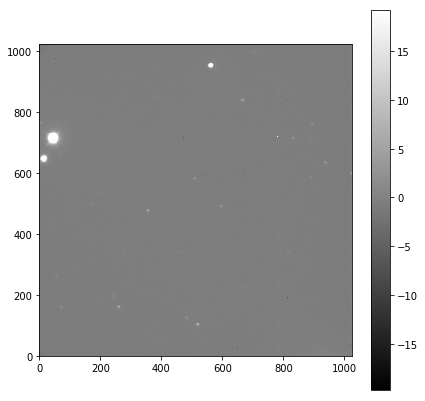

In [190]:
imshow(Master_IC1B)

In [261]:
def object_detector(array,detection_threshold):
    # This will detect the objects in the image using a detection threshold of 1.5 sigma with sigma being the RMS
    objects = sep.extract(array,detection_threshold,err=np.std(Image))
    
    # Now the background subtracted image will be plotted
    fig, ax = plt.subplots(figsize=(7,7))
    m, s = np.mean(array), np.std(array)
    im = ax.imshow(array, interpolation='nearest', cmap='gray',vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    for i in range(len(objects)):
        e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=6*objects['a'][i],\
                    height=6*objects['b'][i],angle=objects['theta'][i] * 180. / np.pi)
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)
        
    flux, fluxerr, flag = sep.sum_circle(array, objects['x'], objects['y'],
                                     3.0, err=np.std(array), gain=1.0)
    # show the objects results:
    for i in range(len(objects)):
        print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

### Object detection on all of the Master images

object 0: flux = 12765.055620 +/- 153.305582
object 1: flux = 60198.805938 +/- 266.281600
object 2: flux = 3441.949590 +/- 119.077687


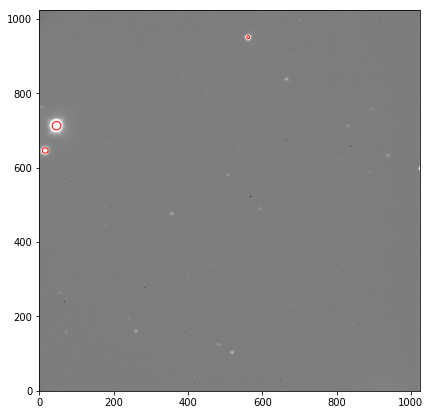

In [262]:
object_detector(Master_IC1B,5)

object 0: flux = 2292.946792 +/- 117.688836
object 1: flux = 16851.446594 +/- 168.940444
object 2: flux = 57080.743198 +/- 262.209280
object 3: flux = 4942.015681 +/- 128.643394


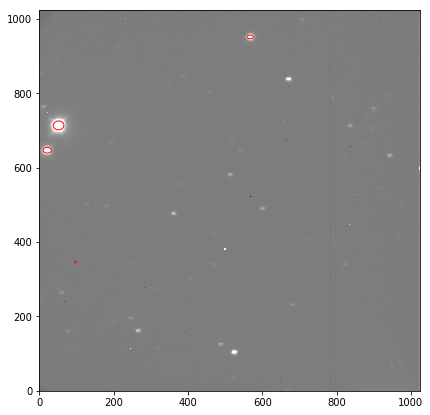

In [263]:
object_detector(Master_IC1V,5)

object 0: flux = 60129.423916 +/- 278.654831


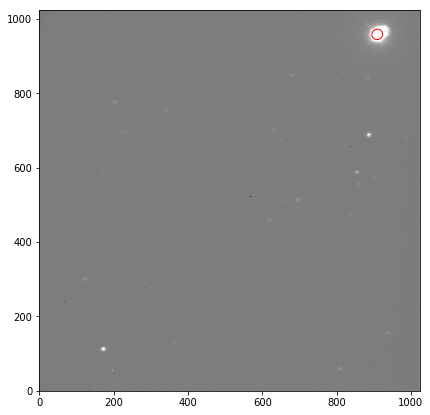

In [264]:
object_detector(Master_IC2B,5)

object 0: flux = 3513.215356 +/- 154.322083
object 1: flux = 60038.309697 +/- 283.240840


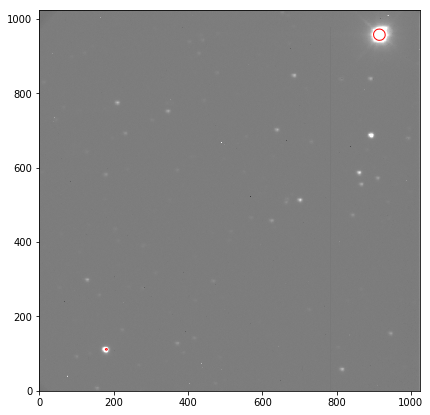

In [265]:
object_detector(Master_IC2V,5)

object 0: flux = 8545.810547 +/- 95.067482


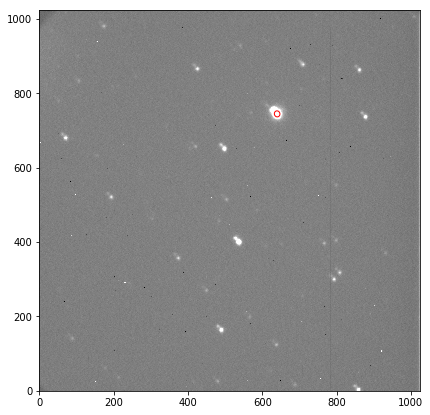

In [266]:
object_detector(Master_IC3B,20)

object 0: flux = 18617.058230 +/- 140.073391


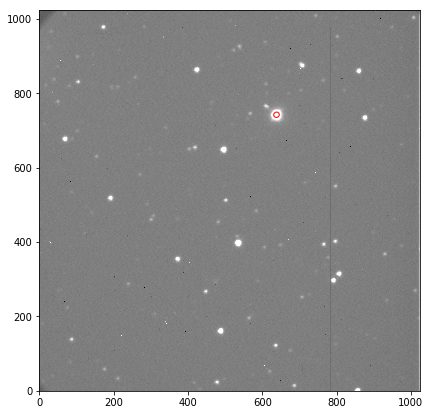

In [267]:
object_detector(Master_IC3V,30)

object 0: flux = 29888.926260 +/- 183.102348
object 1: flux = 32643.027424 +/- 190.528917


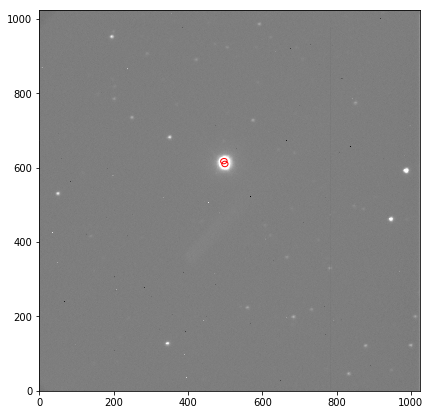

In [268]:
object_detector(Master_IC4B,20)

object 0: flux = 43149.842051 +/- 224.008404
object 1: flux = 45092.374678 +/- 228.303083


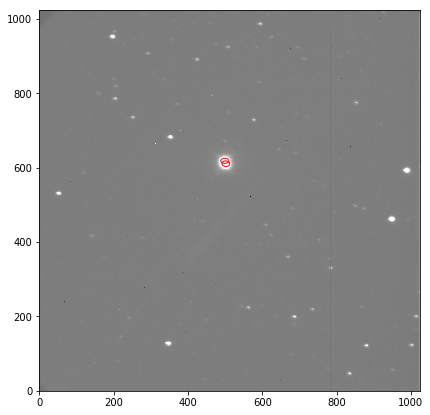

In [269]:
object_detector(Master_IC4V,10)

object 0: flux = 3786.824043 +/- 65.136860


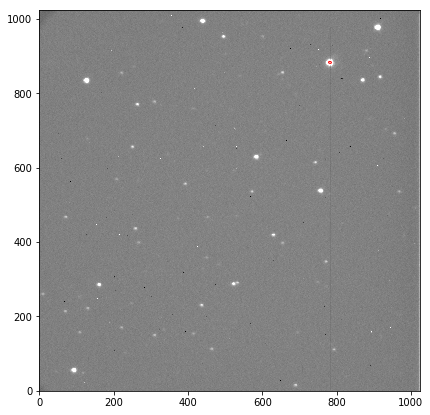

In [270]:
object_detector(Master_IC5B,30)

object 0: flux = 18146.875880 +/- 140.691011
object 1: flux = 20203.739393 +/- 147.851939


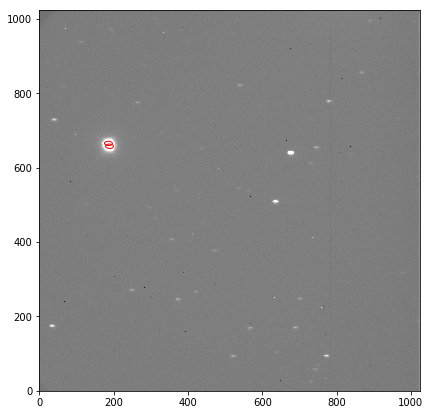

In [271]:
object_detector(Master_IC7B,20)

object 0: flux = 36066.499312 +/- 201.247475
object 1: flux = 39285.337640 +/- 209.121801


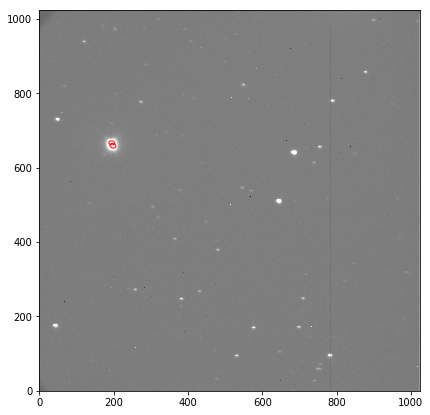

In [272]:
object_detector(Master_IC7V,20)

object 0: flux = 60500.106797 +/- 266.010995


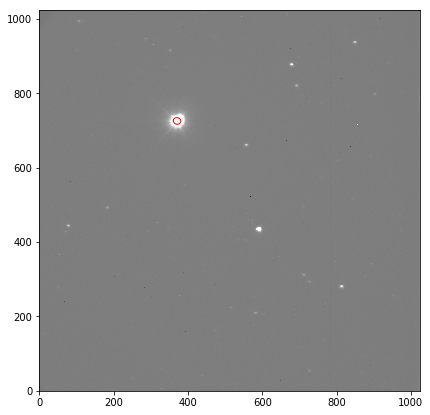

In [273]:
object_detector(Master_IC8B,20)

object 0: flux = 11335.262621 +/- 148.128774
object 1: flux = 60395.727461 +/- 266.491398


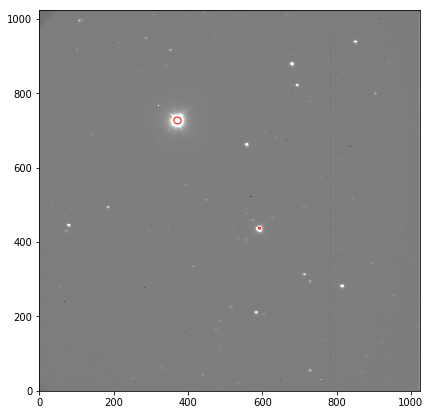

In [274]:
object_detector(Master_IC8V,20)

object 0: flux = 59675.953950 +/- 267.024594
object 1: flux = 37203.556692 +/- 220.937304


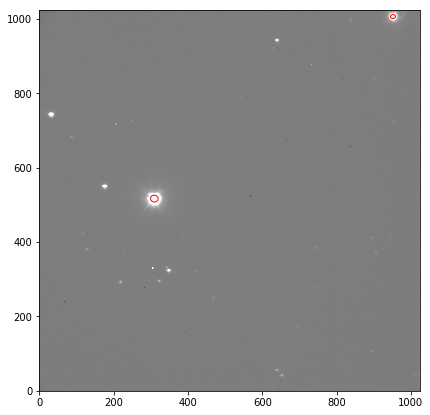

In [275]:
object_detector(Master_IC9B,20)

object 0: flux = 59963.947017 +/- 268.764131
object 1: flux = 44566.392166 +/- 238.331784


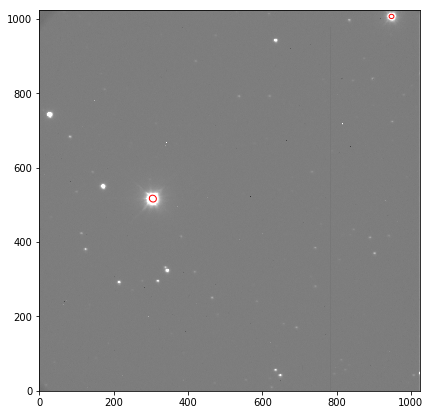

In [276]:
object_detector(Master_IC9V,20)

### This is the standard star

object 0: flux = 7157.220040 +/- 90.564714


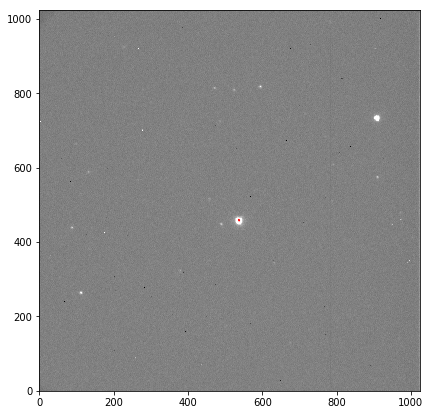

In [281]:
object_detector(Master_SDSSB,50)

object 0: flux = 19095.231257 +/- 143.822297
object 1: flux = 9043.843085 +/- 103.129610


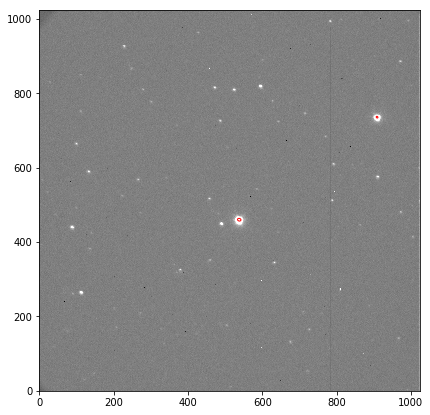

In [284]:
object_detector(Master_SDSSV,50)